In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [3]:
df = pd.read_csv('/home/continuum/Downloads/archive/music_education_dataset.csv')

In [4]:
print(df.head())

             Timestamp   Sensor ID   Student ID Instrument Type  Pitch (Hz)  \
0  2024-12-20 01:42:00  Sensor_002  Student_013           Drums  457.675762   
1  2024-12-20 07:15:00  Sensor_003  Student_020           Piano  981.973109   
2  2024-12-20 05:48:00  Sensor_002  Student_004          Guitar  360.687272   
3  2024-12-20 04:30:00  Sensor_002  Student_010           Piano  754.555153   
4  2024-12-20 01:46:00  Sensor_002  Student_003           Piano  857.152582   

   Rhythm (BPM)  Dynamics (dB)  Note Duration (s)  Pitch Accuracy (%)  \
0     72.683218      72.373407           1.915436           80.839709   
1    178.593033      73.714421           1.140571           89.585202   
2    113.192770      79.543372           0.594411           83.634466   
3     65.739698      76.850374           1.026134           94.861631   
4     64.562622      92.706800           1.854897           96.958558   

   Rhythm Accuracy (%)  Teaching Effectiveness Rating       Lesson Type  \
0          

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 17 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Timestamp                      500 non-null    object 
 1   Sensor ID                      500 non-null    object 
 2   Student ID                     500 non-null    object 
 3   Instrument Type                500 non-null    object 
 4   Pitch (Hz)                     500 non-null    float64
 5   Rhythm (BPM)                   500 non-null    float64
 6   Dynamics (dB)                  500 non-null    float64
 7   Note Duration (s)              500 non-null    float64
 8   Pitch Accuracy (%)             500 non-null    float64
 9   Rhythm Accuracy (%)            500 non-null    float64
 10  Teaching Effectiveness Rating  500 non-null    int64  
 11  Lesson Type                    500 non-null    object 
 12  Student Engagement Level       500 non-null    obj

In [6]:
print(df.isnull())

     Timestamp  Sensor ID  Student ID  Instrument Type  Pitch (Hz)  \
0        False      False       False            False       False   
1        False      False       False            False       False   
2        False      False       False            False       False   
3        False      False       False            False       False   
4        False      False       False            False       False   
..         ...        ...         ...              ...         ...   
495      False      False       False            False       False   
496      False      False       False            False       False   
497      False      False       False            False       False   
498      False      False       False            False       False   
499      False      False       False            False       False   

     Rhythm (BPM)  Dynamics (dB)  Note Duration (s)  Pitch Accuracy (%)  \
0           False          False              False               False   
1        

In [13]:
target_col = 'Target'

In [14]:
for col in df.select_dtypes(include='object'):
    if col != target_col:
        df[col] = LabelEncoder().fit_transform(df[col])


In [15]:
if df[target_col].dtype == 'object':
    df[target_col] = LabelEncoder().fit_transform(df[target_col])

In [16]:
if df[target_col].dtype == 'object':
    df[target_col] = LabelEncoder().fit_transform(df[target_col])

In [17]:
X = df.drop(columns=[target_col])
y = df[target_col]

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [19]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [20]:
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [21]:
y_pred = model.predict(X_test)

In [23]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.97


In [27]:
labels = ['Class 0', 'Class 1'] 

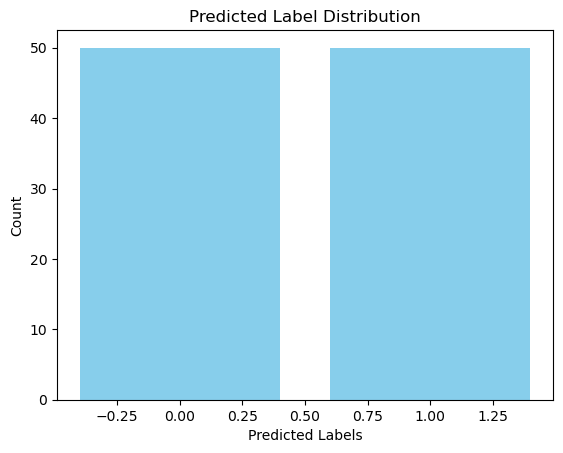

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

plt.bar(labels, values, color='skyblue')
plt.xlabel('Predicted Labels')
plt.ylabel('Count')
plt.title('Predicted Label Distribution')
plt.show()